<a href="https://colab.research.google.com/github/Abhishek-Shubham001/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Problem Statement**

**The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts.**

**The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD).**

**The dataset provides the patients’ information. It includes
over 4,000 records and 15 attributes.**

**Variables**:

**Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.**

# **Data Description**

**Variables**:

Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.

**Demographic:**
* `Sex`: male or female("M" or "F")
* `Age`: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
Behavioral
* `is_smoking`: whether or not the patient is a current smoker ("YES" or "NO")
* `Cigs Per Day`: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Medical( history)**
* `BP Meds`: whether or not the patient was on blood pressure medication (Nominal)
* `Prevalent Stroke`: whether or not the patient had previously had a stroke (Nominal)
* `Prevalent Hyp`: whether or not the patient was hypertensive (Nominal)
* `Diabetes`: whether or not the patient had diabetes (Nominal)

**Medical(current)**
* `Tot Chol`: total cholesterol level (Continuous)
* `Sys BP`: systolic blood pressure (Continuous)
* `Dia BP`: diastolic blood pressure (Continuous)
* `BMI`: Body Mass Index (Continuous)
* `Heart Rate`: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
* `Glucose`: glucose level (Continuous)
Predict variable (desired target)
* **10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -**


##**Importing and Loading Data**

In [96]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import warnings
# warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, MinMaxScaler


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score,precision_score,classification_report,roc_auc_score,roc_curve

In [97]:
#Importing Cardiovascular Risk Prediction dataset into Pandas Dataframe
crp_df= pd.read_csv('/content/drive/MyDrive/Almabetter/Capstone Projects/Cardiovascular Risk Prediction - Abhishek Shubham/data_cardiovascular_risk.csv')

##**Exploring Data Frame**

In [98]:
crp_df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [99]:
crp_df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [100]:
crp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [101]:
# Checking the shape of data
print(f'CRP dataset has {crp_df.shape[0]} rows and {crp_df.shape[1]} columns.')

CRP dataset has 3390 rows and 17 columns.


In [102]:
#Descriptive Statistics
crp_df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [103]:
# Missing Values in each columns
crp_df.isnull().sum().sort_values(ascending= False)

glucose            304
education           87
BPMeds              44
totChol             38
cigsPerDay          22
BMI                 14
heartRate            1
id                   0
diaBP                0
sysBP                0
prevalentHyp         0
diabetes             0
age                  0
prevalentStroke      0
is_smoking           0
sex                  0
TenYearCHD           0
dtype: int64

**Findings:**

* Glucose has the maximum missing values which is 304 followed by 'education', 'BPmeds' and 'totChol'.
* Total 7 columns has missing values and 'heartRate' has the lowest missing value which is 1.

In [104]:
# Checking for duplicate values in the dataset
len(crp_df[crp_df.duplicated()])

0

Look's like there are no duplicate values.

#**Data Preprocessing**

We drop the education and id columns because it has no relation while predicting heart disease.

In [105]:
crp_df.drop(['id', 'education'], axis= 1, inplace= True)

In [106]:
crp_df.head()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


##**Handling Missing Values**

In [107]:
# percentage of missing data per category
total = crp_df.isnull().sum().sort_values(ascending=False)
percent_total = (crp_df.isnull().sum()/crp_df.isnull().count()).sort_values(ascending=False)*100
missing = pd.concat([total, percent_total], axis=1, keys=["Total", "Percentage"])
missing_data = missing[missing['Total']>0]
missing_data

,Total,Percentage
glucose,304,8.967552
BPMeds,44,1.297935
totChol,38,1.120944
cigsPerDay,22,0.648968
BMI,14,0.412979
heartRate,1,0.029499


In [108]:
missing_data.index

Index(['glucose', 'BPMeds', 'totChol', 'cigsPerDay', 'BMI', 'heartRate'], dtype='object')

In [109]:
# let's count the all rows which are having missing values 
count=0
for i in crp_df.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of rows with missing values is ', count)
print(f'Total precentage of missing values in the entire dataset is {round((count/len(crp_df.index))*100)}')

Total number of rows with missing values is  386
Total precentage of missing values in the entire dataset is 11


At 8.97%, the blood glucose entry has the highest percentage of missing data. The otherfeatures have very few missing entries.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


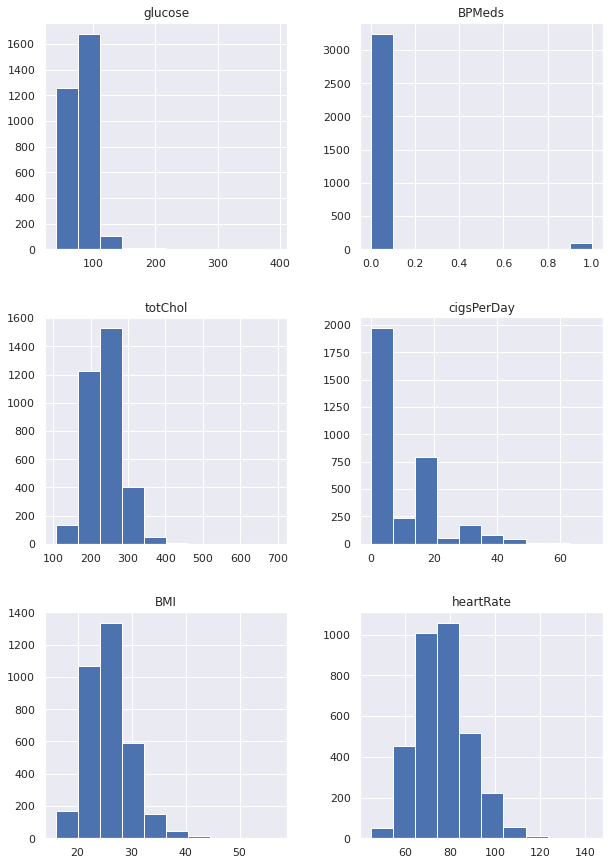

In [110]:
#Checking the distribution for missing data
fig = plt.figure(figsize = (10,15))
ax = fig.gca()
crp_df[missing_data.index].hist(ax = ax)
plt.show()

From above distributions it's clearly visible that most of the data are right skewed. So for skewed data median and mode are suitable to impute the missing values.

In [111]:
#Creating a copy of orignal data
new_df= crp_df.copy()

In [112]:
#Replacing missing values with median or mode depending on column category

crp_df['heartRate']= crp_df['heartRate'].fillna(value=crp_df['heartRate'].median())

crp_df['BMI']= crp_df['BMI'].fillna(crp_df['BMI'].median())

mean_cigsPerDay= round(crp_df[crp_df['is_smoking'] == 'YES']['cigsPerDay'].mean(), 0)
crp_df['cigsPerDay']= crp_df['cigsPerDay'].fillna(mean_cigsPerDay)

median_totChol= crp_df['totChol'].median()
crp_df['totChol']= crp_df['totChol'].fillna(median_totChol)

mode_BPMeds= crp_df['BPMeds'].mode()[0]
crp_df['BPMeds'].fillna(mode_BPMeds, inplace= True)

median_glucose= crp_df['glucose'].median()
crp_df['glucose'].fillna(median_glucose, inplace= True)

In [113]:
#Checking for the presence of missing values after imputations
crp_df.isnull().sum()

age                0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

After the above imputations we can say that all the missings values are successfully removed from our dataset.

#**Exploratory Data Analysis**

##Univariate Analysis

<Figure size 576x360 with 0 Axes>

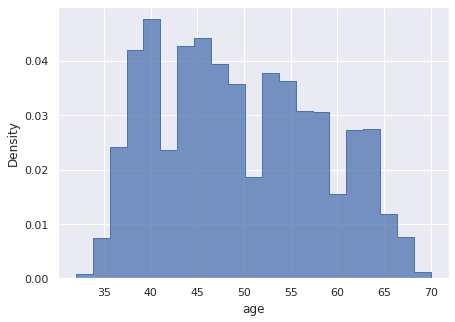

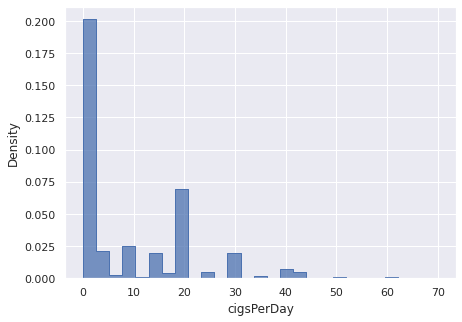

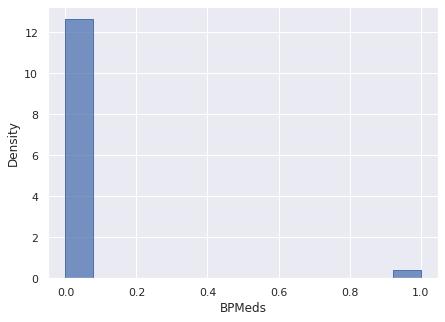

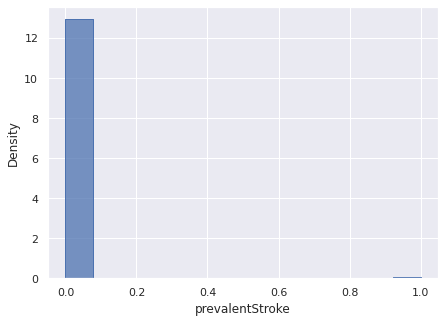

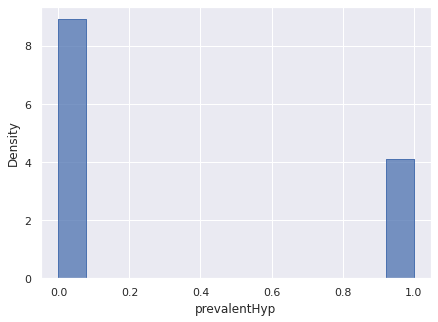

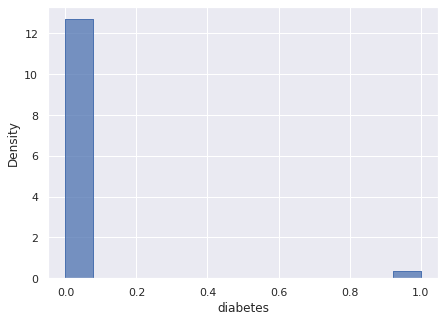

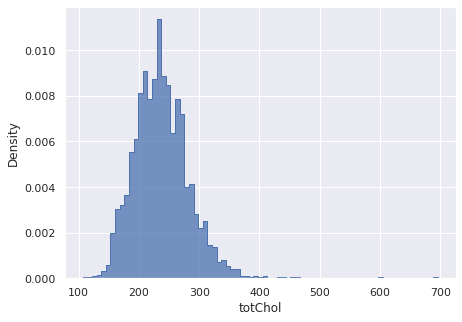

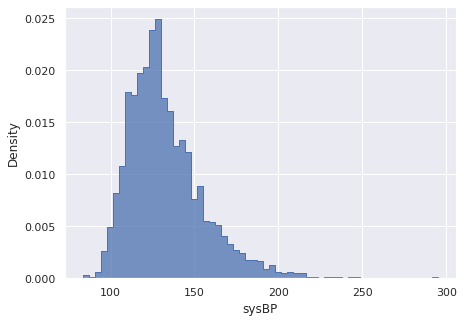

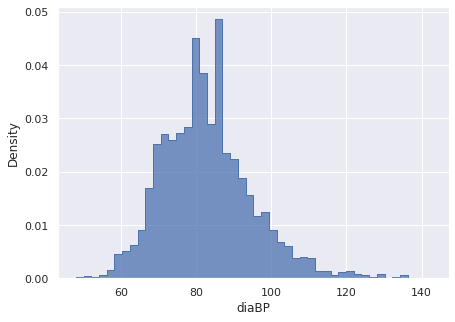

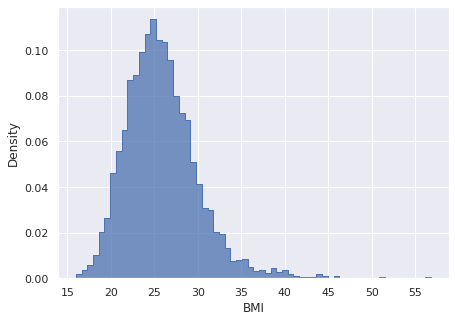

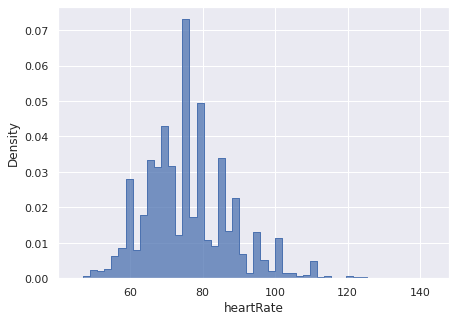

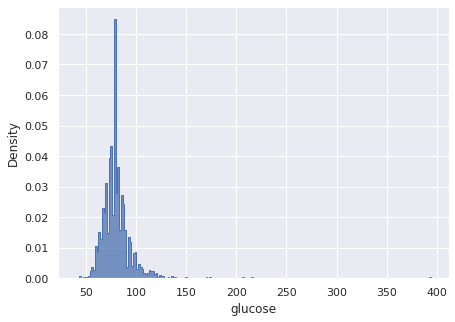

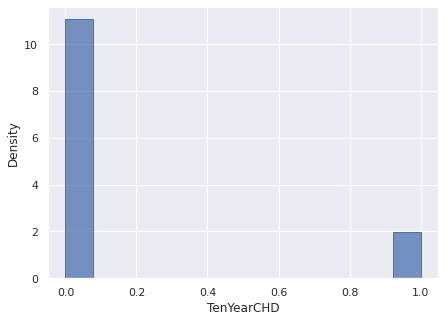

In [114]:
#Distribution of all the features

# Plotting Distributions of all the numerical variables
plt.figure(figsize= [8, 5])
features= list(crp_df.describe().columns)
sns.set(style='darkgrid')
for col in features:
  fig, ax = plt.subplots()
  sns.histplot(crp_df[col], ax= ax, stat= 'density', element= 'step'  )
  fig.set_figheight(5)
  fig.set_figwidth(7)

From above distribution plot we can say that the data on the prevalent stroke, diabetes, and blood pressure meds are poorly balanced. Also continious features like totChol , sysBP, BMI etc are right skewed.

In [115]:
crp_df.head()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [116]:
# Visualizing the dependent variable 'TenYearCHD'
crp_df['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

Text(0.5, 1.0, 'Cardiovascular Risk rate')

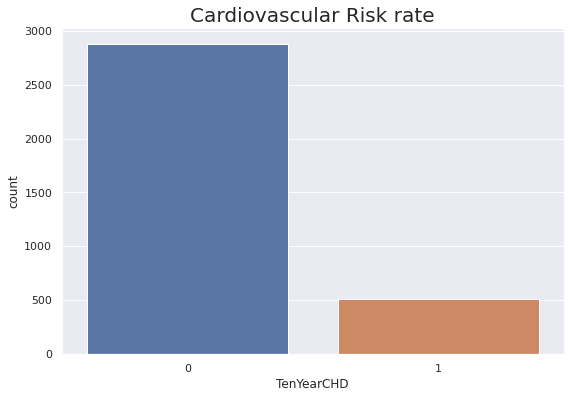

In [117]:
# Visualising dependent variable 'TenYearCHD' using countplot and Pie-chart
plt.figure(figsize= (9, 6))
sns.countplot(x= 'TenYearCHD', data= crp_df)
plt.title('Cardiovascular Risk rate',size = 20)

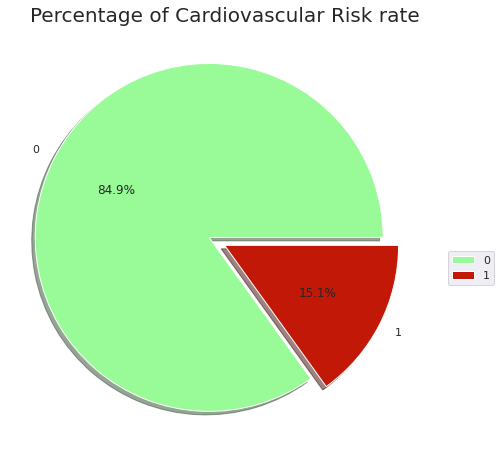

In [118]:
# Pie Chart for Type column
plt.figure(figsize=(10,8))
labels = crp_df['TenYearCHD'].value_counts(sort = True).index
sizes = crp_df['TenYearCHD'].value_counts(sort = True)
colors = ["#98FB98","#C21807"]
explode = (0.1,0)
plt.pie(sizes, explode= explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Percentage of Cardiovascular Risk rate',size = 20)
plt.legend(labels= labels, bbox_to_anchor=(1,0.5))
plt.show()

**Findings:**

* It's clearly visible that there is a class imbalance problem with our datset!
* Number of people without the disease greatly exceeds the number of people with the disease.
* An imbalance occurs when one or more classes have very low proportions in the training data as compared to the other classes.

* Problems with Class Imbalance problem is that the abundance of examples from the majority class (or classes) can swamp the minority class. Most machine learning algorithms for classification predictive models are designed and demonstrated on problems that assume an equal distribution of classes.

In [119]:
crp_df.head()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


Text(0.5, 1.0, 'Count of Male VS Female')

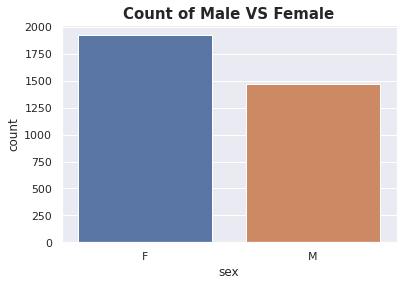

In [120]:
#Visualising the 'Sex' feature using sns countplot

sns.countplot(x= 'sex', data= crp_df )
plt.title('Count of Male VS Female', size= 15, weight='bold')

In our dataset the records of female are more than men.

Text(0.5, 1.0, 'No of people smoking vs not smoking')

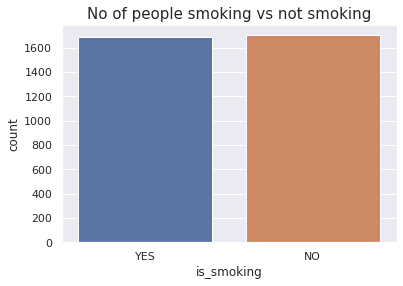

In [121]:
# Peple smoking vs not smoking

sns.countplot(x= 'is_smoking', data= crp_df )
plt.title('No of people smoking vs not smoking', size= 15)

Number of people who smokes vs people wo doesn't is almost similar in the dataset.

In [122]:
crp_df['cigsPerDay'].value_counts()

0.0     1703
20.0     606
30.0     176
15.0     172
10.0     106
9.0      104
5.0      103
3.0       79
40.0      62
1.0       48
25.0      44
43.0      42
18.0      29
35.0      17
2.0       17
6.0       14
8.0       10
7.0        8
60.0       8
4.0        7
50.0       6
17.0       5
23.0       5
11.0       4
12.0       3
13.0       3
19.0       2
16.0       2
45.0       2
14.0       1
70.0       1
38.0       1
Name: cigsPerDay, dtype: int64

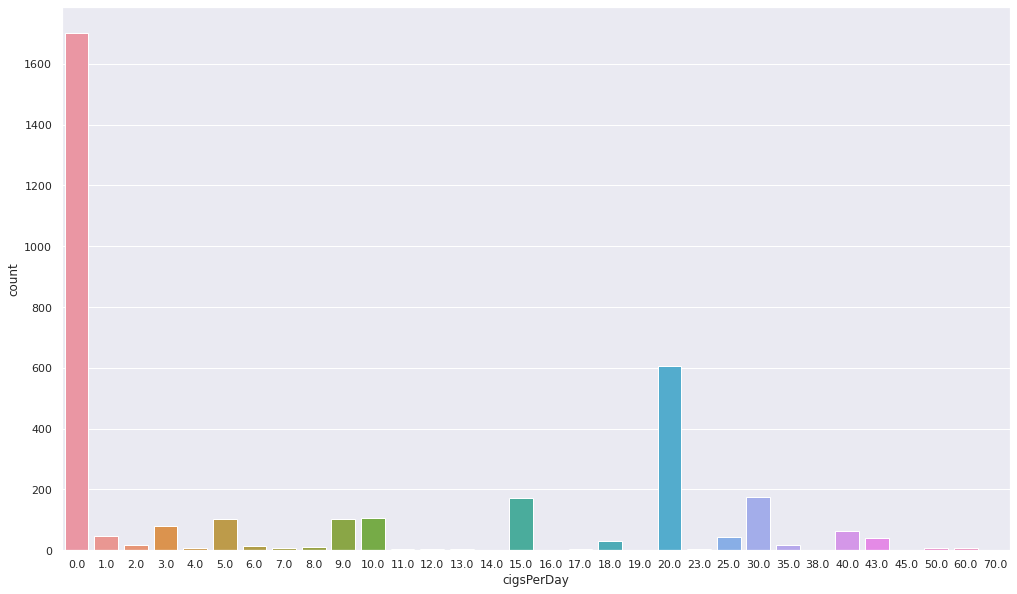

In [123]:
plt.figure(figsize= (17, 10))
sns.countplot(x= 'cigsPerDay', data= crp_df)

In [124]:
crp_df.head()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


Text(0.5, 1.0, 'Count of people who previously had Stroke')

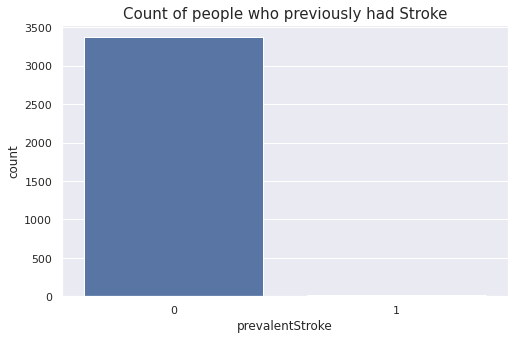

In [125]:
#Visualizing 'prevalentStroke' feature using Sns countplot method
plt.figure(figsize= (8, 5))
sns.countplot(x= 'prevalentStroke', data= crp_df )
plt.title('Count of people who previously had Stroke', size= 15)

In [126]:
crp_df['prevalentStroke'].value_counts()

0    3368
1      22
Name: prevalentStroke, dtype: int64

Number of people having Stroke in past is very less which is 22 vs number of people who didn't have stroke.

Text(0.5, 1.0, 'Count of people who previously had Hypertension')

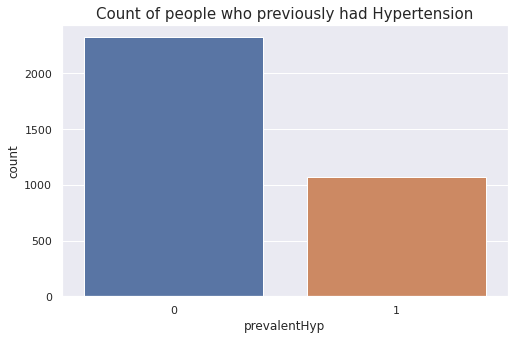

In [127]:
plt.figure(figsize= (8, 5))
sns.countplot(x= 'prevalentHyp', data= crp_df )
plt.title('Count of people who previously had Hypertension', size= 15)

In [128]:
crp_df['prevalentHyp'].value_counts()

0    2321
1    1069
Name: prevalentHyp, dtype: int64

In [129]:
len(crp_df.index)

3390

* Out of 3390 patients from the records 1069 people had Hypertension before.

* In Medical terms High blood pressure (hypertension) is a common condition in which the long-term force of the blood against your artery walls is high enough that it may eventually cause health problems, such as heart disease.

* From medical point of view it can be said that people with hypertension are more like to have heart disease in future.

Text(0.5, 1.0, 'Count of people who had diabetes')

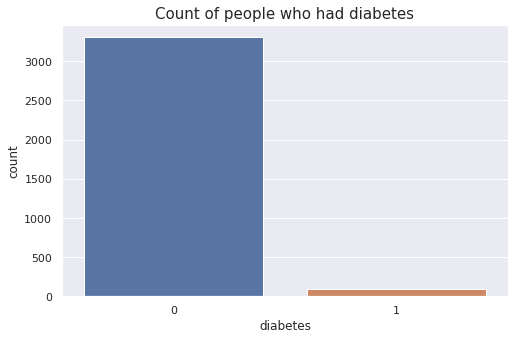

In [130]:
# Visualizing 'diabetes' column
plt.figure(figsize= (8, 5))
sns.countplot(x= 'diabetes', data= crp_df )
plt.title('Count of people who had diabetes', size= 15)

In [131]:
crp_df['diabetes'].value_counts()

0    3303
1      87
Name: diabetes, dtype: int64

* Out of 3390 patients from our records 87 people had diabetes.

* **Interesting fact about diabetes is that if a person have diabetes, then they are twice as likely to have heart disease or a stroke than someone who doesn't have diabetes—and at a younger age. The longer anyone have diabetes, the more likely they are to have heart disease.**

# Bivariate & Multivariate Analysis

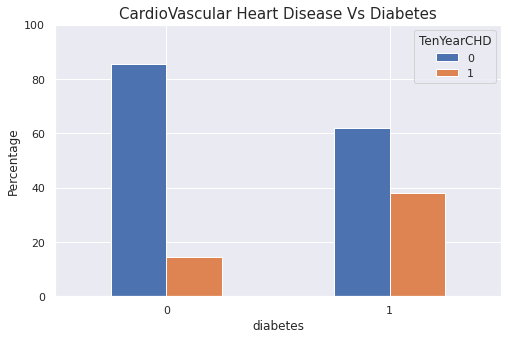

In [132]:
# Percentage of Cardiovascular Risk with or without diabetes
freq_df = crp_df.groupby('TenYearCHD')['diabetes'].value_counts().unstack(0)
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)*100
pct_df.plot(kind="bar", figsize=(8, 5))
plt.ylim(0,100)
plt.title('CardioVascular Heart Disease Vs Diabetes', size= 15)
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()

From the above barplot it's quite evident that diabetic patients tend to have higher 10 year Risk of CHD.

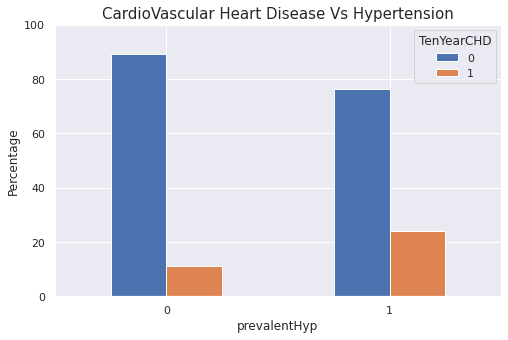

In [133]:
# Percentage of Cardiovascular Risk with or without previous hypertension
freq_df = crp_df.groupby('TenYearCHD')['prevalentHyp'].value_counts().unstack(0)
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)*100
pct_df.plot(kind="bar", figsize=(8, 5))
plt.ylim(0,100)
plt.title('CardioVascular Heart Disease Vs Hypertension', size= 15)
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='TenYearCHD', loc='upper right')
plt.show()

Hypertensive patients tend to have higher risk of 10 Year CHD.

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

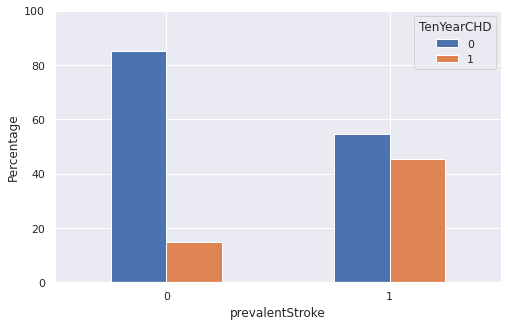

In [134]:
# Percentage of Cardiovascular Risk with or without previous stroke
freq_df = crp_df.groupby('TenYearCHD')['prevalentStroke'].value_counts().unstack(0)
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)*100
pct_df.plot(kind="bar",  figsize=(8, 5))
plt.ylim(0,100)
plt.ylabel('Percentage')
plt.xticks(rotation=0)

Patients with prevalent stroke symptoms have a high 10-year risk of CHD.

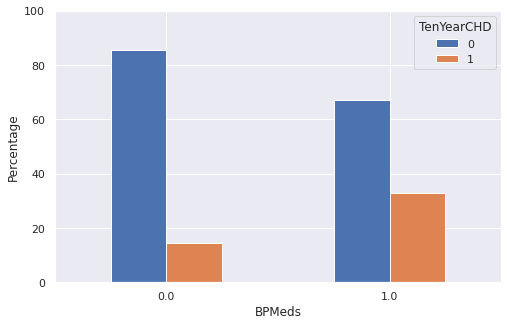

In [135]:
# Percentage of Cardiovascular Risk with or without Blood Pressure Medication
freq_df = crp_df.groupby('TenYearCHD')['BPMeds'].value_counts().unstack(0)
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)*100
pct_df.plot(kind="bar", figsize=(8, 5))
plt.ylim(0,100)
plt.ylabel('Percentage')
plt.legend(title='TenYearCHD', loc='upper right')
plt.xticks(rotation=0)
plt.show()

Patients on Blood Preasure medication have higer risks of getting 10 year CHD as compared to patients who were not on medications.

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

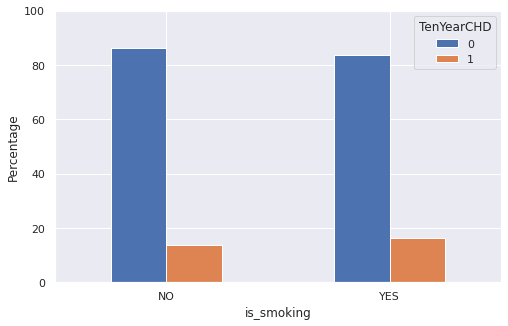

In [136]:
# Percentage of Cardiovascular Risk on smokers vs non smokers
freq_df = crp_df.groupby('TenYearCHD')['is_smoking'].value_counts().unstack(0)
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)*100
pct_df.plot(kind="bar", figsize=(8, 5))
plt.ylim(0,100)
plt.ylabel('Percentage')
plt.xticks(rotation=0)


Patients who are smokers vs non-smokers shows similar risks of 10 Year CHD as per the above bar plot

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

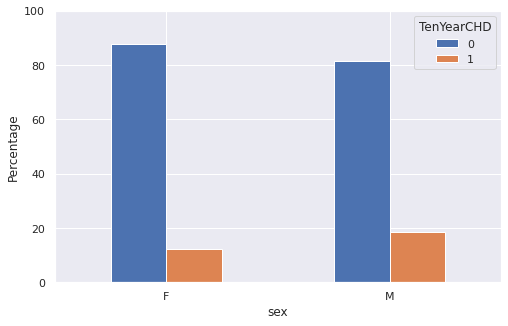

In [137]:
# Percentage of Cardiovascular Risk on male Vs female
freq_df = crp_df.groupby('TenYearCHD')['sex'].value_counts().unstack(0)
pct_df = freq_df.divide(freq_df.sum(axis=1), axis=0)*100
pct_df.plot(kind="bar", figsize=(8, 5))
plt.ylim(0,100)
plt.ylabel('Percentage')
plt.xticks(rotation=0)

As per the above visualization Males has slight higher risk of having 10 Year CHD.

In [138]:
crp_df.head()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


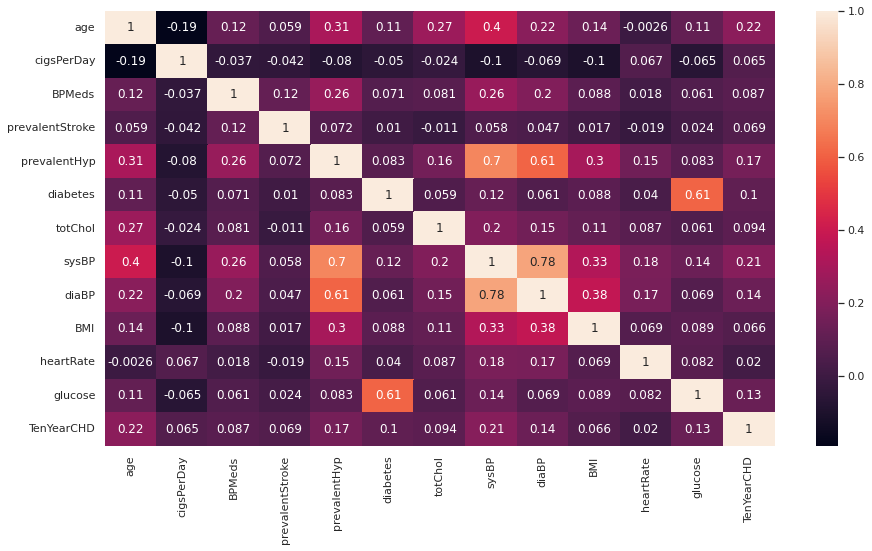

In [139]:
#Checking the coorelation between all the features
plt.figure(figsize=(15,8))
sns.heatmap(crp_df.corr(), annot = True)
plt.show()

From the above correlation plot we can conclude that,

* There are no features with more than 0.5 correlation with the Ten year risk of developing CHD and this shows that the features a poor predictors. However the features with the highest correlations are age, prevalent hypertension(prevalentHyp) and systolic blood pressure(sysBP).

* Also there are a couple of features that are highly correlated with each other and for model building it's best to pick features which are independent of each other.

Coorelated independent features includes:

* Blood glucose and diabetes
* systolic and diastolic blood pressures
* cigarette smoking and the number of cigarretes smoked per day

Hence, we need to carry out feature selection to pick the best features.

# **Feature Engineering**

In [140]:
crp_df.head()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [141]:
#Converting string categorical variable to int with binary inputs
crp_df['sex']= [0 if i=='F' else 1 for i in crp_df['sex']]
crp_df['is_smoking']= [0 if i== 'NO' else 1 for i in crp_df['is_smoking']]

In [142]:
crp_df.head()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [143]:
df2= crp_df.copy()

In [144]:
# Creating new feature avgBP from sysBP and diaBP
df2['avg_BP']= (df2['sysBP'] + df2['diaBP'])/2

In [145]:
df2.head()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,avg_BP
0,64,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1,116.50
1,36,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,133.00
2,46,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,93.50
3,50,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,123.00
4,64,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,110.75


In [146]:
#Dropping sysBP and diaBP feature
df2.drop(['sysBP', 'diaBP'], axis= 1, inplace= True)

In [147]:
df2.head()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,TenYearCHD,avg_BP
0,64,0,1,3.0,0.0,0,0,0,221.0,25.38,90.0,80.0,1,116.50
1,36,1,0,0.0,0.0,0,1,0,212.0,29.77,72.0,75.0,0,133.00
2,46,0,1,10.0,0.0,0,0,0,250.0,20.35,88.0,94.0,0,93.50
3,50,1,1,20.0,0.0,0,1,0,233.0,28.26,68.0,94.0,1,123.00
4,64,0,1,30.0,0.0,0,0,0,241.0,26.42,70.0,77.0,0,110.75


# Modelling and predicting with Machine Learning

## Class Imbalanced issue and Evaluation-metric to be chosen

Since our dataset is imbalanced i.e for every positive case there are about 5-6 negative cases. We may end up with a classifier that is biased to the negative cases. The classifier may have a high accuracy but poor a precision and recall.

To handle this problem we will balance the dataset using the Synthetic Minority Oversampling Technique (SMOTE).

**SMOTE :**

SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are then added between the chosen point and its neighbors.

SMOTE algorithm works in 4 simple steps:

Choose a minority class as the input vector
Find its k nearest neighbors (k_neighbors is specified as an argument in the SMOTE() function)
Choose one of these neighbors and place a synthetic point anywhere on the line joining the point under consideration and its chosen neighbor
Repeat the steps until data is balanced

In [148]:
#define the features
X = df2.drop('TenYearCHD', axis= 1)
y = df2['TenYearCHD']

In [149]:
len(X.columns)

13

In [150]:
# Applying smoothing technique to handle imbalance target class
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)

print('Original dataset shape', len(df2))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 3390
Resampled dataset shape 5758


In [151]:
x_smote.head()

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,avg_BP
0,64,0,1,3.0,0.0,0,0,0,221.0,25.38,90.0,80.0,116.50
1,36,1,0,0.0,0.0,0,1,0,212.0,29.77,72.0,75.0,133.00
2,46,0,1,10.0,0.0,0,0,0,250.0,20.35,88.0,94.0,93.50
3,50,1,1,20.0,0.0,0,1,0,233.0,28.26,68.0,94.0,123.00
4,64,0,1,30.0,0.0,0,0,0,241.0,26.42,70.0,77.0,110.75


In [152]:
#train test spiilt
X_train, X_test, y_train, y_test= train_test_split(x_smote, y_smote, test_size = 0.2, random_state = 42)

In [153]:
# Function to get train and test accuracy and Roc score!
def evaluation_metrics(train_preds, test_preds):

  train_accuracy = accuracy_score(y_train,train_preds)
  test_accuracy = accuracy_score(y_test,test_preds)
  train_aoc= roc_auc_score(y_train,train_preds)
  test_aoc= roc_auc_score(y_test,test_preds)

  print("The accuracy on train data is ", train_accuracy)
  print("The accuracy on test data is ", test_accuracy)

  print("\nThe aoc score on train data is:", train_aoc)
  print("The aoc score on test data is:", test_aoc) 

## **Logistic Regression**

In [154]:
# search for optimun parameters using gridsearch
params = {'penalty':['l1','l2'],
         'C' : [1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1e-3,1e+4,1e+5,1e+6],
         'class_weight':['balanced',None]}
logistic_clf = GridSearchCV(LogisticRegression(),param_grid=params,cv=10, scoring='roc_auc')

In [155]:
#logistic regression with default parameters: 
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(fit_intercept=True, max_iter=10000, random_state= 0)
clf_lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=0)

In [156]:
clf_lr.score(X_train, y_train)

0.6676074685193226

In [157]:
#Without Scaling
clf_lr.score(X_train, y_train)

0.6676074685193226

In [158]:
train_preds_lr= clf_lr.predict(X_train) 
test_preds_lr= clf_lr.predict(X_test)
evaluation_metrics(train_preds_lr, test_preds_lr)

The accuracy on train data is  0.6676074685193226
The accuracy on test data is  0.6675347222222222

The aoc score on train data is: 0.6675613352339148
The aoc score on test data is: 0.6676201045213157


In [159]:
#Without Scaling
train_preds_lr= clf_lr.predict(X_train) 
test_preds_lr= clf_lr.predict(X_test)
evaluation_metrics(train_preds_lr, test_preds_lr)

The accuracy on train data is  0.6676074685193226
The accuracy on test data is  0.6675347222222222

The aoc score on train data is: 0.6675613352339148
The aoc score on test data is: 0.6676201045213157


In [160]:
# search for optimun parameters using gridsearch
params = {'C' : [1, 4, 6, 8 ,10,100],
         'class_weight':['balanced',None]}

In [161]:
clf_lr_cv = GridSearchCV(LogisticRegression(random_state= 0),param_grid=params,cv=10, scoring='roc_auc', verbose= 3)
clf_lr_cv.fit(X_train_a, y_train_a)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV 1/10] END .......C=1, class_weight=balanced;, score=0.740 total time=   0.2s
[CV 2/10] END .......C=1, class_weight=balanced;, score=0.725 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV 3/10] END .......C=1, class_weight=balanced;, score=0.697 total time=   0.2s
[CV 4/10] END .......C=1, class_weight=balanced;, score=0.685 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV 5/10] END .......C=1, class_weight=balanced;, score=0.697 total time=   0.2s
[CV 6/10] END .......C=1, class_weight=balanced;, score=0.683 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 7/10] END .......C=1, class_weight=balanced;, score=0.710 total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV 8/10] END .......C=1, class_weight=balanced;, score=0.755 total time=   0.2s
[CV 9/10] END .......C=1, class_weight=balanced;, score=0.722 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV 10/10] END ......C=1, class_weight=balanced;, score=0.665 total time=   0.2s
[CV 1/10] END ...........C=1, class_weight=None;, score=0.749 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV 2/10] END ...........C=1, class_weight=None;, score=0.722 total time=   0.2s
[CV 3/10] END ...........C=1, class_weight=None;, score=0.696 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV 4/10] END ...........C=1, class_weight=None;, score=0.685 total time=   0.2s
[CV 5/10] END ...........C=1, class_weight=None;, score=0.677 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV 6/10] END ...........C=1, class_weight=None;, score=0.680 total time=   0.2s
[CV 7/10] END ...........C=1, class_weight=None;, score=0.694 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV 8/10] END ...........C=1, class_weight=None;, score=0.753 total time=   0.2s
[CV 9/10] END ...........C=1, class_weight=None;, score=0.726 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV 10/10] END ..........C=1, class_weight=None;, score=0.684 total time=   0.2s
[CV 1/10] END .......C=4, class_weight=balanced;, score=0.749 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV 2/10] END .......C=4, class_weight=balanced;, score=0.728 total time=   0.1s
[CV 3/10] END .......C=4, class_weight=balanced;, score=0.714 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV 4/10] END .......C=4, class_weight=balanced;, score=0.687 total time=   0.2s
[CV 5/10] END .......C=4, class_weight=balanced;, score=0.698 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV 6/10] END .......C=4, class_weight=balanced;, score=0.692 total time=   0.2s
[CV 7/10] END .......C=4, class_weight=balanced;, score=0.710 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 8/10] END .......C=4, class_weight=balanced;, score=0.758 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV 9/10] END .......C=4, class_weight=balanced;, score=0.723 total time=   0.3s
[CV 10/10] END ......C=4, class_weight=balanced;, score=0.662 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV 1/10] END ...........C=4, class_weight=None;, score=0.744 total time=   0.2s
[CV 2/10] END ...........C=4, class_weight=None;, score=0.725 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV 3/10] END ...........C=4, class_weight=None;, score=0.698 total time=   0.2s
[CV 4/10] END ...........C=4, class_weight=None;, score=0.684 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV 5/10] END ...........C=4, class_weight=None;, score=0.678 total time=   0.3s
[CV 6/10] END ...........C=4, class_weight=None;, score=0.680 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV 7/10] END ...........C=4, class_weight=None;, score=0.694 total time=   0.3s
[CV 8/10] END ...........C=4, class_weight=None;, score=0.753 total time=   0.2s
[CV 9/10] END ...........C=4, class_weight=None;, score=0.725 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV 10/10] END ..........C=4, class_weight=None;, score=0.661 total time=   0.2s
[CV 1/10] END .......C=6, class_weight=balanced;, score=0.750 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 2/10] END .......C=6, class_weight=balanced;, score=0.726 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV 3/10] END .......C=6, class_weight=balanced;, score=0.715 total time=   0.2s
[CV 4/10] END .......C=6, class_weight=balanced;, score=0.685 total time=   0.2s
[CV 5/10] END .......C=6, class_weight=balanced;, score=0.695 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV 6/10] END .......C=6, class_weight=balanced;, score=0.679 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV 7/10] END .......C=6, class_weight=balanced;, score=0.703 total time=   0.2s
[CV 8/10] END .......C=6, class_weight=balanced;, score=0.759 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 9/10] END .......C=6, class_weight=balanced;, score=0.720 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV 10/10] END ......C=6, class_weight=balanced;, score=0.664 total time=   0.2s
[CV 1/10] END ...........C=6, class_weight=None;, score=0.750 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV 2/10] END ...........C=6, class_weight=None;, score=0.721 total time=   0.2s
[CV 3/10] END ...........C=6, class_weight=None;, score=0.700 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV 4/10] END ...........C=6, class_weight=None;, score=0.686 total time=   0.2s
[CV 5/10] END ...........C=6, class_weight=None;, score=0.698 total time=   0.2s
[CV 6/10] END ...........C=6, class_weight=None;, score=0.680 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV 7/10] END ...........C=6, class_weight=None;, score=0.709 total time=   0.2s
[CV 8/10] END ...........C=6, class_weight=None;, score=0.753 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV 9/10] END ...........C=6, class_weight=None;, score=0.725 total time=   0.2s
[CV 10/10] END ..........C=6, class_weight=None;, score=0.665 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV 1/10] END .......C=8, class_weight=balanced;, score=0.738 total time=   0.2s
[CV 2/10] END .......C=8, class_weight=balanced;, score=0.726 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV 3/10] END .......C=8, class_weight=balanced;, score=0.711 total time=   0.2s
[CV 4/10] END .......C=8, class_weight=balanced;, score=0.685 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV 5/10] END .......C=8, class_weight=balanced;, score=0.697 total time=   0.2s
[CV 6/10] END .......C=8, class_weight=balanced;, score=0.692 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV 7/10] END .......C=8, class_weight=balanced;, score=0.697 total time=   0.2s
[CV 8/10] END .......C=8, class_weight=balanced;, score=0.755 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV 9/10] END .......C=8, class_weight=balanced;, score=0.719 total time=   0.2s
[CV 10/10] END ......C=8, class_weight=balanced;, score=0.662 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV 1/10] END ...........C=8, class_weight=None;, score=0.753 total time=   0.2s
[CV 2/10] END ...........C=8, class_weight=None;, score=0.721 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV 3/10] END ...........C=8, class_weight=None;, score=0.705 total time=   0.2s
[CV 4/10] END ...........C=8, class_weight=None;, score=0.684 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV 5/10] END ...........C=8, class_weight=None;, score=0.698 total time=   0.2s
[CV 6/10] END ...........C=8, class_weight=None;, score=0.683 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV 7/10] END ...........C=8, class_weight=None;, score=0.694 total time=   0.2s
[CV 8/10] END ...........C=8, class_weight=None;, score=0.753 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV 9/10] END ...........C=8, class_weight=None;, score=0.728 total time=   0.1s
[CV 10/10] END ..........C=8, class_weight=None;, score=0.677 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV 1/10] END ......C=10, class_weight=balanced;, score=0.747 total time=   0.2s
[CV 2/10] END ......C=10, class_weight=balanced;, score=0.726 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV 3/10] END ......C=10, class_weight=balanced;, score=0.716 total time=   0.2s
[CV 4/10] END ......C=10, class_weight=balanced;, score=0.684 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV 5/10] END ......C=10, class_weight=balanced;, score=0.687 total time=   0.2s
[CV 6/10] END ......C=10, class_weight=balanced;, score=0.685 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV 7/10] END ......C=10, class_weight=balanced;, score=0.702 total time=   0.2s
[CV 8/10] END ......C=10, class_weight=balanced;, score=0.753 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV 9/10] END ......C=10, class_weight=balanced;, score=0.726 total time=   0.2s
[CV 10/10] END .....C=10, class_weight=balanced;, score=0.677 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV 1/10] END ..........C=10, class_weight=None;, score=0.742 total time=   0.2s
[CV 2/10] END ..........C=10, class_weight=None;, score=0.728 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV 3/10] END ..........C=10, class_weight=None;, score=0.704 total time=   0.2s
[CV 4/10] END ..........C=10, class_weight=None;, score=0.682 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV 5/10] END ..........C=10, class_weight=None;, score=0.675 total time=   0.2s
[CV 6/10] END ..........C=10, class_weight=None;, score=0.679 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV 7/10] END ..........C=10, class_weight=None;, score=0.693 total time=   0.2s
[CV 8/10] END ..........C=10, class_weight=None;, score=0.766 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV 9/10] END ..........C=10, class_weight=None;, score=0.722 total time=   0.2s
[CV 10/10] END .........C=10, class_weight=None;, score=0.686 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV 1/10] END .....C=100, class_weight=balanced;, score=0.749 total time=   0.2s
[CV 2/10] END .....C=100, class_weight=balanced;, score=0.726 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV 3/10] END .....C=100, class_weight=balanced;, score=0.698 total time=   0.2s
[CV 4/10] END .....C=100, class_weight=balanced;, score=0.685 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV 5/10] END .....C=100, class_weight=balanced;, score=0.689 total time=   0.2s
[CV 6/10] END .....C=100, class_weight=balanced;, score=0.678 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV 7/10] END .....C=100, class_weight=balanced;, score=0.710 total time=   0.2s
[CV 8/10] END .....C=100, class_weight=balanced;, score=0.757 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV 9/10] END .....C=100, class_weight=balanced;, score=0.726 total time=   0.2s
[CV 10/10] END ....C=100, class_weight=balanced;, score=0.668 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV 1/10] END .........C=100, class_weight=None;, score=0.748 total time=   0.2s
[CV 2/10] END .........C=100, class_weight=None;, score=0.726 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV 3/10] END .........C=100, class_weight=None;, score=0.716 total time=   0.2s
[CV 4/10] END .........C=100, class_weight=None;, score=0.677 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV 5/10] END .........C=100, class_weight=None;, score=0.677 total time=   0.2s
[CV 6/10] END .........C=100, class_weight=None;, score=0.680 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV 7/10] END .........C=100, class_weight=None;, score=0.694 total time=   0.2s
[CV 8/10] END .........C=100, class_weight=None;, score=0.753 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV 9/10] END .........C=100, class_weight=None;, score=0.726 total time=   0.2s
[CV 10/10] END ........C=100, class_weight=None;, score=0.681 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


GridSearchCV(cv=10, estimator=LogisticRegression(random_state=0),
             param_grid={'C': [1, 4, 6, 8, 10, 100],
                         'class_weight': ['balanced', None]},
             scoring='roc_auc', verbose=3)

In [162]:
clf_lr_cv.best_params_

{'C': 4, 'class_weight': 'balanced'}

In [163]:
#Without Scaling
clf_lr_cv.best_params_

{'C': 4, 'class_weight': 'balanced'}

In [164]:
train_preds_lr_cv= clf_lr_cv.predict(X_train) 
test_preds_lr_cv= clf_lr_cv.predict(X_test)
evaluation_metrics(train_preds_lr_cv, test_preds_lr_cv)

The accuracy on train data is  0.6458966565349544
The accuracy on test data is  0.640625

The aoc score on train data is: 0.6458718917573592
The aoc score on test data is: 0.6410690968525996


In [165]:
#Without Scaling
train_preds_lr_cv= clf_lr_cv.predict(X_train) 
test_preds_lr_cv= clf_lr_cv.predict(X_test)
evaluation_metrics(train_preds_lr_cv, test_preds_lr_cv)

The accuracy on train data is  0.6458966565349544
The accuracy on test data is  0.640625

The aoc score on train data is: 0.6458718917573592
The aoc score on test data is: 0.6410690968525996


## **Decision Trees**

In [166]:
dt_clf= DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)

In [167]:
dt_clf.score(X_train, y_train)

0.6743378202344767

In [169]:
train_preds_dt= dt_clf.predict(X_train) 
test_preds_dt=  dt_clf.predict(X_test)
evaluation_metrics(train_preds_dt, test_preds_dt)

The accuracy on train data is  0.6743378202344767
The accuracy on test data is  0.6675347222222222

The aoc score on train data is: 0.673734265523301
The aoc score on test data is: 0.6699722864716365


###Decision Tree hyperparameter tuning

In [171]:
 param_dict= {'criterion': ['gini', 'entropy'],
                'max_depth': [4, 5, 6],
                'min_samples_leaf': [20, 30, 40, 50],
                'min_samples_split': [30, 40, 50, 100, 150]}

In [172]:
dt_grid= GridSearchCV(DecisionTreeClassifier(), param_grid= param_dict, cv= 5, verbose= 3 )

dt_grid.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5] END criterion=gini, max_depth=4, min_samples_leaf=20, min_samples_split=30;, score=0.689 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, min_samples_leaf=20, min_samples_split=30;, score=0.653 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, min_samples_leaf=20, min_samples_split=30;, score=0.666 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, min_samples_leaf=20, min_samples_split=30;, score=0.675 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, min_samples_leaf=20, min_samples_split=30;, score=0.647 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, min_samples_leaf=20, min_samples_split=40;, score=0.689 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, min_samples_leaf=20, min_samples_split=40;, score=0.653 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, min_samples_leaf=20, min_samples_split=40;, score=0.666 total time=   0.0s
[

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6],
                         'min_samples_leaf': [20, 30, 40, 50],
                         'min_samples_split': [30, 40, 50, 100, 150]},
             verbose=3)

In [173]:
dt_grid.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 20,
 'min_samples_split': 30}

In [176]:
dt_grid.score(X_train, y_train)

0.7253582283977421

In [179]:
train_preds_dt_gd= dt_grid.predict(X_train) 
test_preds_dt_gd= dt_grid.predict(X_test)
evaluation_metrics(train_preds_dt_gd, test_preds_dt_gd)

The accuracy on train data is  0.7253582283977421
The accuracy on test data is  0.703125

The aoc score on train data is: 0.7246668325904473
The aoc score on test data is: 0.706188349461863


## **Random Forest Model**

In [181]:
clf_rf= RandomForestClassifier(max_leaf_nodes=20, random_state=0)
clf_rf.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=20, random_state=0)

In [182]:
clf_rf.score(X_train, y_train)

0.7362136343899262

In [184]:
train_preds_rf= clf_rf.predict(X_train) 
test_preds_rf= clf_rf.predict(X_test)
evaluation_metrics(train_preds_rf,test_preds_rf )

The accuracy on train data is  0.7362136343899262
The accuracy on test data is  0.7161458333333334

The aoc score on train data is: 0.7359662420526281
The aoc score on test data is: 0.7173536746811738


### Random Forest With Grid_Search CV

In [186]:
# search for optimun parameters using gridsearch
params_rf = {
    'max_depth': [4, 6, 8],
    'min_samples_leaf': [40, 50],
    'min_samples_split': [50, 100, 150],
    'n_estimators': [50, 80, 100]
  }

random_clf = GridSearchCV(RandomForestClassifier(),param_grid= params_rf,cv=10, scoring='roc_auc', verbose= 3)
random_clf.fit(X_train,y_train)

Fitting 10 folds for each of 54 candidates, totalling 540 fits
[CV 1/10] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50;, score=0.834 total time=   0.2s
[CV 2/10] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50;, score=0.771 total time=   0.2s
[CV 3/10] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50;, score=0.767 total time=   0.2s
[CV 4/10] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50;, score=0.762 total time=   0.2s
[CV 5/10] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50;, score=0.757 total time=   0.2s
[CV 6/10] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50;, score=0.729 total time=   0.2s
[CV 7/10] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50;, score=0.773 total time=   0.3s
[CV 8/10] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50;, score=0.760 tota

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             scoring='roc_auc', verbose=3)

In [187]:
random_clf.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 80}

In [189]:
random_clf.score(X_train, y_train)

0.8555590123009855

In [222]:
train_preds_rf_cv= random_clf.predict(X_train)
test_preds_rf_cv= random_clf.predict(X_test)
evaluation_metrics(train_preds_rf_cv, test_preds_rf_cv)

The accuracy on train data is  0.761615284411637
The accuracy on test data is  0.7256944444444444

The aoc score on train data is: 0.7613993408300714
The aoc score on test data is: 0.7268483475921799


## **XG Boost**

In [193]:
#Changing parameters again to get the best results and remove overfitting issue
param_dict_xgb= {
    'gamma' : [1, 2],
    'max_depth': [4],
    'n_estimators': [60,80,100,120],
    'learning_rate': [0.1,0.2]
}

In [194]:
xgb_grid = GridSearchCV(estimator=XGBClassifier(),
                       param_grid = param_dict_xgb,
                       cv = 5, verbose=3, scoring='roc_auc')

xgb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END gamma=1, learning_rate=0.1, max_depth=4, n_estimators=60;, score=0.912 total time=   0.3s
[CV 2/5] END gamma=1, learning_rate=0.1, max_depth=4, n_estimators=60;, score=0.885 total time=   0.2s
[CV 3/5] END gamma=1, learning_rate=0.1, max_depth=4, n_estimators=60;, score=0.870 total time=   0.3s
[CV 4/5] END gamma=1, learning_rate=0.1, max_depth=4, n_estimators=60;, score=0.884 total time=   0.3s
[CV 5/5] END gamma=1, learning_rate=0.1, max_depth=4, n_estimators=60;, score=0.888 total time=   0.3s
[CV 1/5] END gamma=1, learning_rate=0.1, max_depth=4, n_estimators=80;, score=0.923 total time=   0.3s
[CV 2/5] END gamma=1, learning_rate=0.1, max_depth=4, n_estimators=80;, score=0.896 total time=   0.3s
[CV 3/5] END gamma=1, learning_rate=0.1, max_depth=4, n_estimators=80;, score=0.883 total time=   0.3s
[CV 4/5] END gamma=1, learning_rate=0.1, max_depth=4, n_estimators=80;, score=0.893 total time=   0.3s
[CV 5/5] END

GridSearchCV(cv=5, estimator=XGBClassifier(),
             param_grid={'gamma': [1, 2], 'learning_rate': [0.1, 0.2],
                         'max_depth': [4], 'n_estimators': [60, 80, 100, 120]},
             scoring='roc_auc', verbose=3)

In [195]:
xgb_grid.best_params_

{'gamma': 1, 'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 120}

In [197]:
xgb_grid.score(X_train, y_train)

0.9824299914775513

In [199]:
train_preds_xgb= xgb_grid.predict(X_train)
test_preds_xgb= xgb_grid.predict(X_test)
evaluation_metrics(train_preds_xgb,test_preds_xgb)

The accuracy on train data is  0.93573599652627
The accuracy on test data is  0.8645833333333334

The aoc score on train data is: 0.9358957244458522
The aoc score on test data is: 0.8639654772064522


In [201]:
param_dict_xgb1= {
    'gamma' : [0.1, 1, 2],
    'max_depth': [3, 4, 5 ],
    'n_estimators': [40, 50, 60],
    'learning_rate': [0.01, 0.1, 0.2]
}



In [202]:
xgb_grid1 = GridSearchCV(estimator=XGBClassifier(),
                       param_grid = param_dict_xgb1,
                       cv = 5, verbose=3, scoring='roc_auc')

xgb_grid1.fit(X_train,y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV 1/5] END gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=40;, score=0.770 total time=   0.1s
[CV 2/5] END gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=40;, score=0.713 total time=   0.1s
[CV 3/5] END gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=40;, score=0.734 total time=   0.1s
[CV 4/5] END gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=40;, score=0.743 total time=   0.1s
[CV 5/5] END gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=40;, score=0.718 total time=   0.1s
[CV 1/5] END gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.775 total time=   0.2s
[CV 2/5] END gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.727 total time=   0.2s
[CV 3/5] END gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.736 total time=   0.2s
[CV 4/5] END gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.746 tot

GridSearchCV(cv=5, estimator=XGBClassifier(),
             param_grid={'gamma': [0.1, 1, 2],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [40, 50, 60]},
             scoring='roc_auc', verbose=3)

In [203]:
xgb_grid1.score(X_train, y_train)

0.9807881945230068

In [207]:
xgb_grid1.best_params_

{'gamma': 1, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 60}

In [211]:
train_preds_xgb1 = xgb_grid1.predict(X_train)
test_preds_xgb1 = xgb_grid1.predict(X_test)
evaluation_metrics(train_preds_xgb1,test_preds_xgb1)

The accuracy on train data is  0.9281372123317412
The accuracy on test data is  0.8498263888888888

The aoc score on train data is: 0.9282636076355107
The aoc score on test data is: 0.8492598165901203


##**Support Vector Machine**

In [215]:
# Grid search for optimum parameters
Cs = [5, 6, 7, 8, 9, 10]
gammas = [0.001, 0.01, 0.1, 1]
kernel= ['rbf']
param_grid = {'C': Cs, 'gamma' : gammas, 'kernel': kernel}


In [216]:
svm_clf = GridSearchCV(SVC(), param_grid, cv=10,  verbose= 3)
#training the classifier
svm_clf.fit(X_train,y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
[CV 1/10] END .....C=5, gamma=0.001, kernel=rbf;, score=0.831 total time=   1.2s
[CV 2/10] END .....C=5, gamma=0.001, kernel=rbf;, score=0.777 total time=   1.2s
[CV 3/10] END .....C=5, gamma=0.001, kernel=rbf;, score=0.805 total time=   1.2s
[CV 4/10] END .....C=5, gamma=0.001, kernel=rbf;, score=0.783 total time=   1.2s
[CV 5/10] END .....C=5, gamma=0.001, kernel=rbf;, score=0.787 total time=   1.2s
[CV 6/10] END .....C=5, gamma=0.001, kernel=rbf;, score=0.781 total time=   1.1s
[CV 7/10] END .....C=5, gamma=0.001, kernel=rbf;, score=0.754 total time=   1.1s
[CV 8/10] END .....C=5, gamma=0.001, kernel=rbf;, score=0.776 total time=   1.2s
[CV 9/10] END .....C=5, gamma=0.001, kernel=rbf;, score=0.774 total time=   1.2s
[CV 10/10] END ....C=5, gamma=0.001, kernel=rbf;, score=0.776 total time=   1.2s
[CV 1/10] END ......C=5, gamma=0.01, kernel=rbf;, score=0.937 total time=   1.6s
[CV 2/10] END ......C=5, gamma=0.01, kernel=rb

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [5, 6, 7, 8, 9, 10],
                         'gamma': [0.001, 0.01, 0.1, 1], 'kernel': ['rbf']},
             verbose=3)

In [217]:
svm_clf.best_params_

{'C': 5, 'gamma': 0.01, 'kernel': 'rbf'}

In [218]:
train_preds_svc_gd= svm_clf.predict(X_train)
test_preds_svc_gd= svm_clf.predict(X_test)
evaluation_metrics(train_preds_svc_gd, test_preds_svc_gd)

The accuracy on train data is  0.9984802431610942
The accuracy on test data is  0.9201388888888888

The aoc score on train data is: 0.9984740668672837
The aoc score on test data is: 0.9205686249084005


In [242]:
svm_clf1= SVC(C= 0.000001, gamma= 0.0000001, kernel= 'rbf')
svm_clf1.fit(X_train, y_train)

SVC(C=1e-06, gamma=1e-07)

In [243]:
svm_clf1.score(X_train, y_train)

0.5028224055579679

In [244]:
train_preds_svc= svm_clf.predict(X_train)
test_preds_svc= svm_clf.predict(X_test)
evaluation_metrics(train_preds_svc, test_preds_svc)

The accuracy on train data is  0.9984802431610942
The accuracy on test data is  0.9201388888888888

The aoc score on train data is: 0.9984740668672837
The aoc score on test data is: 0.9205686249084005


From all these executions I came to understand one fact about SVC is that when the data is not scaled then SVC model gives the best test results.